In [1]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`
┌ Info: Precompiling OrbitalNeuralMethods [6de8678a-dd1c-461e-a987-24da1d9562b4]
└ @ Base loading.jl:1423


In [2]:
using BenchmarkTools: @btime
import Plots as plt

## Pairing Basis and Pairing System

In [17]:
g_values = -1:0.01:1
l = 8
n = 4

function CCSD_pairing_energy(g, l, n)
    basis = Pairing(l, g)
    system = System(n, basis);
    
    ccsd = setup_CCSD(system);
    compute_ground_state!(ccsd, max_iter = 1000, tol = 1e-10)
    
    return energy(ccsd)
end

function CCD_pairing_energy(g, l, n)
    basis = Pairing(l, g)
    system = System(n, basis);
    
    ccd = setup_CCD(system);
    compute_ground_state!(ccd, max_iter = 1000, tol = 1e-10)
    
    return energy(ccd)
end;

In [18]:
reference_es = (2 .- g_values)

ccsd_es = CCSD_pairing_energy.(g_values, l, n) .- reference_es;
ccd_es = CCD_pairing_energy.(g_values, l, n) .- reference_es;
exact_es = pairing_exact.(g_values) .- reference_es;
mbpt2_es = pairing_MBPT2.(g_values) .- reference_es;

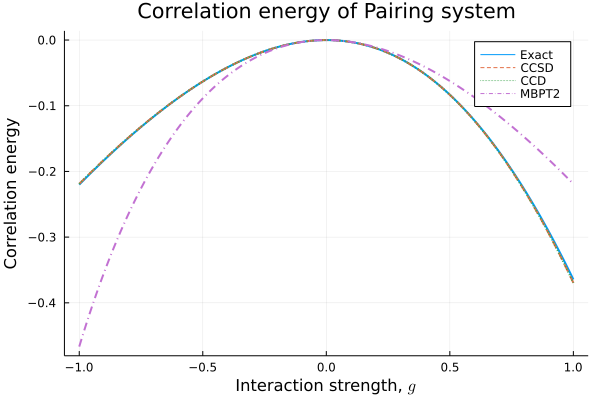

In [23]:
plt.plot(title="Correlation energy of Pairing system", xlabel="Interaction strength, \$g\$", ylabel="Correlation energy")
plt.plot!(g_values, exact_es, label="Exact", ls=:solid, lw=2)
plt.plot!(g_values, ccsd_es, label="CCSD", ls=:dash, lw=2)
plt.plot!(g_values, ccd_es, label="CCD", ls=:dot, lw=2)
plt.plot!(g_values, mbpt2_es, label="MBPT2", ls=:dashdot, lw=2)
plt.savefig("pairing_energy.png")
plt.plot!()